In [17]:
from datasets import load_dataset
import numpy as np
import pandas as pd
from datasets import get_dataset_split_names
from datasets import get_dataset_config_names
import librosa
import soundfile

In [18]:
from datasets import config

print(config.HF_DATASETS_CACHE)

/home/dheinz/.cache/huggingface/datasets


## Configs and Split names for datasets 


In [19]:
dataset_name_mozilla = "mozilla-foundation/common_voice_17_0"
dataset_name_facebook = "facebook/multilingual_librispeech"


configs = get_dataset_config_names(dataset_name_facebook)
split_names = get_dataset_split_names(dataset_name_facebook, configs[0])


In [20]:
print(f"each indiduval Language: {configs}")
print(f"each split option for each language: {split_names}")

each indiduval Language: ['dutch', 'french', 'german', 'italian', 'polish', 'portuguese', 'spanish']
each split option for each language: ['dev', 'test', 'train', '9_hours', '1_hours']


In [21]:
german_dataset = load_dataset(dataset_name_facebook, "german", split="1_hours", streaming=False)

In [22]:
sample = next(iter(german_dataset))

In [23]:
false_sampling_rate = []

for index in range(len(german_dataset)):
    sampling_rate = german_dataset[index]["audio"]["sampling_rate"]
    if sampling_rate != 16_000:
        false_sampling_rate.append(index)

In [24]:
audio_sample = german_dataset[10]["audio"]["array"]
duration_sample = german_dataset[10]["audio_duration"]

In [27]:
sample

{'audio': {'path': '10433_10388_000008.opus',
  'array': array([-3.17698345e-04, -1.51090004e-04, -1.55553407e-05, ...,
          2.16232889e-04,  4.12653280e-05,  5.84542504e-05]),
  'sampling_rate': 16000},
 'original_path': 'http://www.archive.org/download/samtliche_schriften_teil_5_1607_librivox/samtlicheschriften5_15_ossietzky_64kb.mp3',
 'begin_time': 76.91,
 'end_time': 93.52,
 'transcript': 'und kein anderer ist es schweigt sieht weiterschreitend die leichte mütze in der hand über das dunkle grün der weideflächen hinaus in die von sachtem dämmern überblaßte ferne',
 'audio_duration': 16.61,
 'speaker_id': '10433',
 'chapter_id': '10388',
 'file': '10433_10388_000008.opus',
 'id': '10433_10388_000008'}

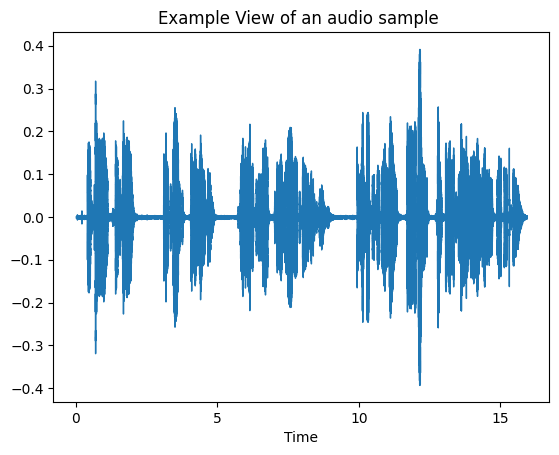

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(audio_sample, sr=16_000, ax=ax)
ax.set(title='Example View of an audio sample ')
ax.label_outer()

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

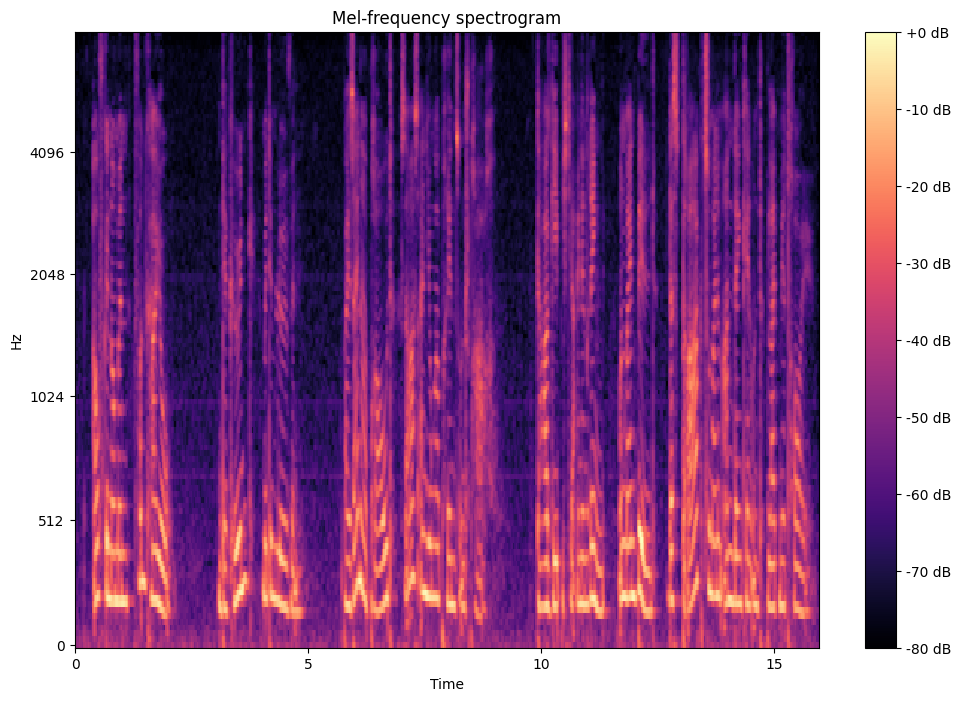

In [47]:
S = librosa.feature.melspectrogram(y=audio_sample, sr=sr, n_mels=128,
                                    fmax=8000)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
fig.set_size_inches(12, 8)
ax.set(title='Mel-frequency spectrogram')